In [1]:
### importare pandas, seaborn e matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### IMPORT DEI DATI

I dati sono nella cartella in formato .csv, sotto il nome 'cars.csv'. Caricare il csv in DataFrame Pandas. NB. il dataset originale è disponibile qui: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

In [2]:
### importare i dati con pd.read_csv()
df = pd.read_csv('cars.csv')

### TRAIN/TEST SPLIT

In [3]:
# importare train_test_split da sklearn.model_selection
from sklearn.model_selection import train_test_split


In [4]:
# Dividere il dataset in train/test set, utilizzando una test_size=0.25, shuffle=True, random_state=22
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

### FEATURES & TARGET

In [5]:
### creare X_train e X_test selezionando solo le features 'km_driven','mileage','max_power','seats'
features = ['km_driven','mileage','max_power','seats']
X_train = train_df[features].copy()
X_test = test_df[features].copy()


In [7]:
### creare y_train e y_test, il nome del target è 'selling_price'
y_train = train_df['selling_price'].copy()
y_test = test_df['selling_price'].copy()

In [8]:
y_train

1596     434999
4543     525000
702      400000
2016     150000
2172     229999
         ...   
356      800000
7104     640000
4908     950000
6276    3000000
2933     625000
Name: selling_price, Length: 5929, dtype: int64

### STANDARDIZATION

In [45]:
### importare StandardScaler da sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
### eseguire .fit_transform sulle feature del train set
X_train_scaled = scaler.fit_transform(X_train)


In [47]:
### usare lo scaler fittato per fare .transform sulle feature del test set
X_test_scaled = scaler.transform(X_test)

In [48]:
X_test_scaled

array([[ 1.48248622, -2.21287123,  0.78991337,  1.64454645],
       [-1.00226805, -0.10128403,  0.0814713 , -0.43756243],
       [-0.21711286, -0.30002165, -0.08584638, -0.43756243],
       ...,
       [-0.41315679,  1.78423912, -0.49714568, -0.43756243],
       [ 0.01096617, -1.02044552, -0.22294614,  1.64454645],
       [-0.37744028,  0.06515872,  0.96338654, -0.43756243]])

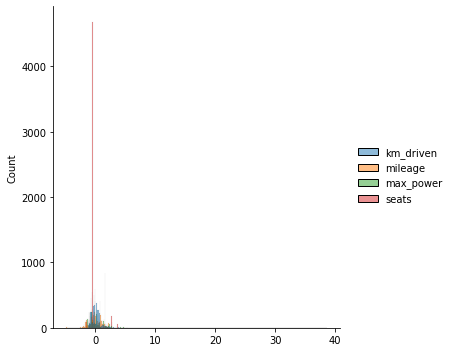

In [49]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
sns.displot(X_train_scaled)
plt.show() #mileage è un valore che va da 0-25 circa, quindi sembra essere in una colonna perché standardizzato

### FITTING

In [13]:
### importare KNearestNeighbors da sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor
 
model = KNeighborsRegressor()

In [50]:
### eseguire il fitting del modello sul train_df_scaled, usando la funzione .fit()
### FITTING
#il test non va MAI fittato perché voglio i dati grezzi
model = model.fit(X_train_scaled, y_train)
#esiste anche il modo model.fit_predict

### PREDICTION

In [38]:

def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_error, r2_score
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
   
    if verbose:
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
        
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

In [ ]:
over = train_metrics['r2']-test_metrics['r2']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


TRAIN SET
MAE:  124570.16205803766
R2:  0.9092731235682118


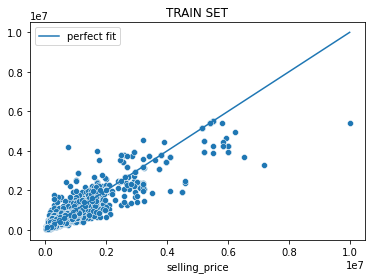

TEST SET
MAE:  133549.58275430612
R2:  0.8702544939968145


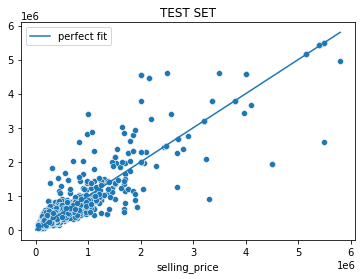

In [51]:
### fare previsioni sia sul train_df_scaled che sul test_df_scaled usando la funzione .predict()

train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

over = train_metrics['r2']-test_metrics['r2']
#C'è un po' di over fitting perché train set è maggiore di test set

###MinMax 

In [53]:
from sklearn.preprocessing import MinMaxScaler #è più intuitivo, ma tipicamente si usa standard scaler
scaler = MinMaxScaler()
X_train_scaledminmax = scaler.fit_transform(X_train)
X_test_scaledminmax = scaler.transform(X_test) 

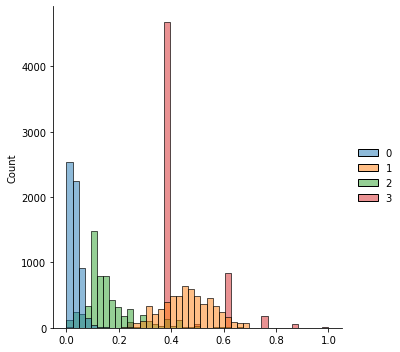

In [54]:
sns.displot(X_train_scaledminmax)
plt.show()

### EVALUATION

In [19]:
### importare mean_absolute_error e r2_score da sklearn.metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score 

In [20]:
### calcolare MAE e R2 del modello sia sul train_set che sul test_set, e poi printarli
train_mae = mean_absolute_error(y_train, train_preds) #y_train sono i target
train_r2 = r2_score(y_train, train_preds) 
print('TRAIN SET')
print('MAE: ', train_mae)
print('R2: ', train_r2)

test_mae = mean_absolute_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

print('\nTEST SET')
print('MAE: ', test_mae)
print('R2: ', test_r2)

TRAIN SET
MAE:  95590.26550851745
R2:  0.9423445632004421

TEST SET
MAE:  116455.68042488619
R2:  0.8953150635381143


### TUNING

In [21]:
### Provare a trovare un buon valore di n_neighbors

In [57]:
train_r2_list = list()
test_r2_list = list()

k_list = range(1, 40)

for k in k_list:
    
    print('\nK:',k)
    
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True) #plots=False così non viene il grafico
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    over = train_metrics['r2']-test_metrics['r2']
    print('La differenza è: ' , over)
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]


K: 1
TRAIN SET
MAE:  19596.938269522685
R2:  0.9949926258673502
TEST SET
MAE:  144297.92817400102
R2:  0.8781351246822883
La differenza è:  0.11685750118506188

K: 2
TRAIN SET
MAE:  86061.4121268342
R2:  0.9535104262470714
TEST SET
MAE:  147116.2124430956
R2:  0.8786864568444854
La differenza è:  0.07482396940258595

K: 3
TRAIN SET
MAE:  115923.33114072075
R2:  0.918193738509086
TEST SET
MAE:  152024.43146181083
R2:  0.8698554748577397
La differenza è:  0.0483382636513463

K: 4
TRAIN SET
MAE:  133582.9747849553
R2:  0.8866706353946758
TEST SET
MAE:  161424.9859635812
R2:  0.8503581948778455
La differenza è:  0.03631244051683036

K: 5
TRAIN SET
MAE:  146831.9785798617
R2:  0.8590255026292705
TEST SET
MAE:  168403.9085483055
R2:  0.8295588880422073
La differenza è:  0.029466614587063122

K: 6
TRAIN SET
MAE:  156233.52740765727
R2:  0.8394553918386609
TEST SET
MAE:  171863.07502950597
R2:  0.8244490944408855
La differenza è:  0.01500629739777537

K: 7
TRAIN SET
MAE:  164659.62561742528
R

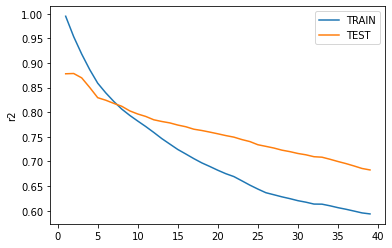

In [58]:
plt.plot(k_list, train_r2_list, label='TRAIN')
plt.plot(k_list, test_r2_list, label='TEST')
plt.legend()
plt.ylabel('r2' )
plt.show()

#MAPE


In [66]:
def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_percentage_error, r2_score
    
    mape = mean_absolute_percentage_error(targets, preds)
    r2 = r2_score(targets, preds)
   
    if verbose:
        print(title)
        print('MAE: ', mape)
        print('R2: ', r2)
        
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mape, 'r2':r2}

In [68]:
from sklearn.metrics import mean_absolute_percentage_error #il valore migliore è 0

#Usare il modello per fare una sola previsione

In [71]:
X_train_scaled =pd.DataFrame(X_train_scaled)

In [72]:
X_train_scaled

,km_driven,mileage,max_power,seats
0,-0.748959,0.358297,-0.241413,-0.437562
1,-0.681411,1.140826,-0.497985,-0.437562
2,0.855328,-0.856487,-0.830102,1.644546
3,-0.157906,-0.598128,-0.609064,-0.437562
4,1.193073,-1.947060,1.296343,1.644546
...,...,...,...,...
5924,0.010966,-0.762087,2.728896,-0.437562
5925,-1.069817,0.022927,-0.084168,-0.437562
5926,-0.748959,1.215353,-0.091442,-0.437562
5927,0.010966,-0.757118,2.684129,-0.437562


In [74]:
casa = X_train_scaled.iloc[0:1]

In [75]:
casa

,km_driven,mileage,max_power,seats
0,-0.748959,0.358297,-0.241413,-0.437562


In [76]:
model.predict(casa) #fa una sola previsione

array([1562641.02564103])